# OIP 2019 WB8 Ex3 (Differential Calculus):

We are looking at the following optimisation problem: 
\begin{alignat}{3}
    \underset{(x,y)\in\mathbb{R}^2}{\operatorname{minimize}} \; &x(x+1) + y^2, &&\nonumber\\
      \text{subject to } &x + y = 1. && \nonumber
\end{alignat}
  State the minimum of the _unconstrained_ problem. 

In [2]:
# sympy imports for calculation and nice display: 
from sympy.interactive.printing import init_printing
from sympy.matrices import *
from sympy.plotting import plot3d
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

# For matplotlib plotting functionality (sympy has no nice contour etc...)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# for non-standard color maps
import matplotlib.cm as cm

# Some house holding: 
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# to suppress unwanted warnings in the notebook...
import warnings
warnings.filterwarnings('ignore')

## Let's define the function with the sympy toolbox: 

In [3]:
x, y = symbols("x y")
f = x*(x+1) + y**2
display(f)

## Let's visualise first, to see what we are dealing with: 

... the sympy way: 

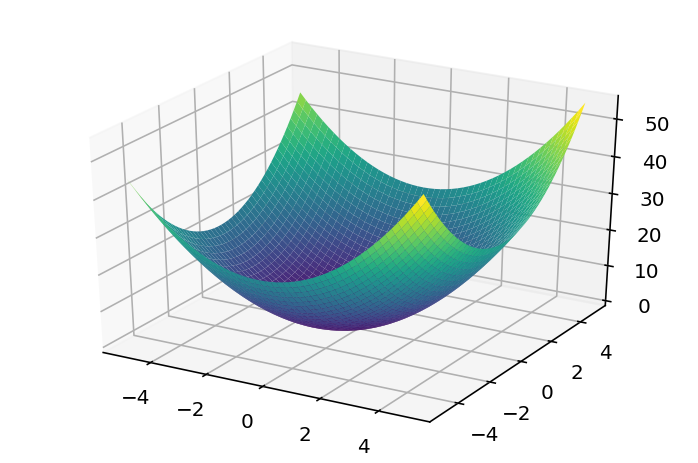

In [4]:
ymin = -5
ymax = 5
xmin = -5
xmax = 5
plot3d(f, (x, xmin, xmax), (y, ymin, ymax));

Since sympy plotting is a little limited, let's try to plot the function again, using the matplotlib (requires numpy and discretised coordinates...): 

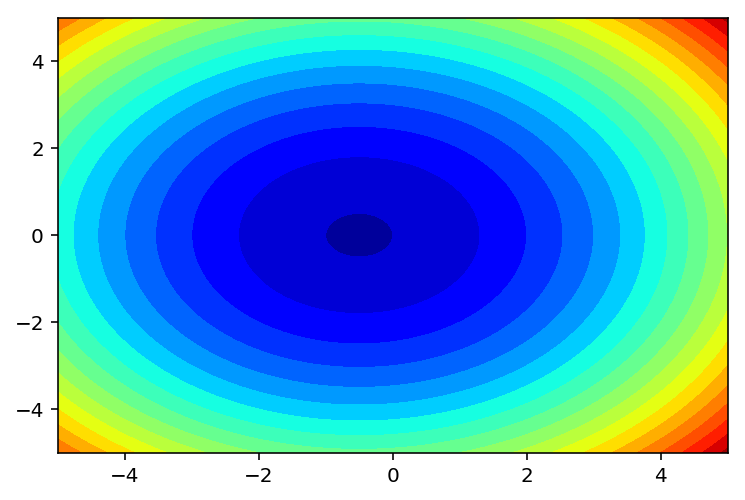

In [5]:
# For Matplotlib plotting: 
fnumpy = lambdify((x, y), f, 'numpy')
xx = np.linspace(xmin, xmax, 1000)
yy = np.linspace(ymin, ymax, 1000)
X, Y = np.meshgrid(xx, yy)

fig = plt.figure()
ax = fig.gca()
c = ax.contourf(X, Y, fnumpy(X, Y), 20, cmap=cm.jet)

## Solution:
... build the gradient: 

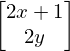

In [6]:
grad_f = Matrix([f]).jacobian([x, y])
display(transpose(grad_f))

solve $\nabla f(x,y) = \vec 0$:

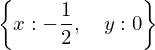

In [7]:
CRP = solve(grad_f,[x,y])
display(CRP)
# Note, that for ONE CRITICAL POINT the resulting data type is "dict"... 
# in order to comply with the plot style for higher-order solutions to such equations, 
# we convert to a list of lists: 
CRP = [[CRP[x],CRP[y]]]

-> Let's display these critical points:

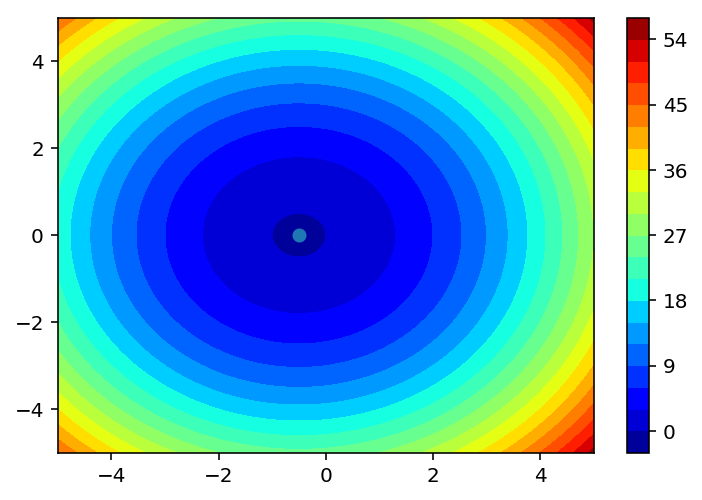

In [8]:
fig = plt.figure()
ax = fig.gca()
c = ax.contourf(X, Y, fnumpy(X, Y), 20, cmap=cm.jet)
for cnt in range(len(CRP)):
    ax.scatter(CRP[cnt][0], CRP[cnt][1])
plt.ylim((ymin, ymax))
plt.xlim((ymin, ymax))
plt.colorbar(c)
plt.show()

We build the Hessian's eigenvalues to check wether it's a minumum or maximum:

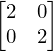

In [9]:
H = hessian(f,[x,y])
display(H)

Since diagonal matrices carry their eigenvalues on the main diagonal, we directly see that the Hessian has the eignenvalue $2$ (with multiplicity $2$). Let's calculate them for fun:  

In [10]:
display(H.eigenvals())

Consequently, the Hessian is positive definite and we conclude that the critical/stationary point $(-1/2,0)$ minimises the unconstrained problem. The minimum reads: 

In [11]:
min_val = f.subs({x:CRP[0][0], y:CRP[0][1]})
display(min_val)